#  Machine Learning Project -


**Responsible**: Khaoula TIDRIRI, Associate Professor at Grenoble INP (Ense3), Researcher at GIPSA Lab (Team SAFE).                             
**E-mail**: khaoula.tidriri@grenoble-inp.fr.

**Adapted from**: « Hands on machine learning with scikit-learn and tensorflow »



In this project, you will pretend to be a recently hired data scientist in *Machine Learning Housing Corporation*. The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data. We will just call them "districts" for short.

Your model should learn from this data and be able to predict the **median housing price in any distrit**, given all the other metrics.

**Remark**: We chose the *California Housing Prices* dataset from the StatLib repository. A categorical attribute was added and a few features were removed for teaching purposes. This data has many qualities for learning and will help you see some of the techniques that you can re-use in your real projects.

Since you are a well-organized data scientist, the first thing you do is to pull out your Machine Learning Project Checklist. This checklist should work reasonably well for most ML projects but make sure to adapt it to your needs.

Here are the main steps that you could go through:

- Business understanding
- Data downloading
- Data visualization
- Data preparation for Machine Learning algorithms
- Model selection and training
- Model fine-tuning
- Solution presentation



## Learning outcomes:

1.	Implement the different elements of data-preprocessing 
2.	Select and implement Machine Learning algorithms to answer real-world business problem
3.	Determine which model is the most suitable for a regression task
4.	Estimate how the model will perform.
5.	Present a well-reasoned solution to the business problem


## What is expected from you:

1. Form a group of 2 people and work together on this project. 
2. Provide a 4-page report by group, highlighting your main findings (without code) --> (Deadline: **January 15th**).
3. Prepare and record a presentation of 10min by group, describing your solution --> (Deadline: **January 17th**)
4. During our last session on **Tuesday 19 January**, we will watch the presentations together. So be ready to answer questions about your solution during this last session.

# 1) Business understanding

- The first question to ask your boss is what exactly is the business objective. Building a model is probably not the end goal. How does the company expect to use and benefit from this model? This is important because it will determine how you frame the problem, what algorithms you will select, what performance measures you will use to evaluate your model, and how much effort you should spend tuning it.

- Your boss answers that your model's output (a prediction of a district's median housing price) will be fed to another Machine Learning system, along with many other signals. This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.


- The second question to ask is what the current solution looks like (if any). It will often give you a reference performance, as well as insights on how to solve the problem. 

- The answer is that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district (excluding median housing prices), and they use complex rules to come up with an estimate. This is costly and time-consuming, and their estimates are not great; their typical error rate is about $15\%$.



**OP NOTE**
BUSINESS OBJECTIVE : Improve on existing error rate which is 15% (ie. 85% accuracy)


# 2) Data downloading

First, let's import some common libraries:

In [1]:
# Common imports
import numpy as np
import os
import tarfile
from six.moves import urllib

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In this laboratory, you will download a single compressed file, *housing.tgz*, which contains a comma-separated value (CSV) file called *housing.csv* with all the data.

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [3]:
fetch_housing_data()

Now, let's load the data using Pandas. Here, we are going to use a small function to do it:

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

This function returns a Pandas Dataframe object containing all the data.

In [5]:
housing = load_housing_data()

**With all this information, you are now ready to start designing your solution.**

## Step 1 - Data Visualisation

In [6]:
print(housing.columns)
print(housing.shape)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
(20640, 10)


**OP Note** We have 10 features for each district, and a total of 20640 rows.

In [7]:
print(housing.head(3))
print(housing.tail(3),end="\n\n")
print(housing.ocean_proximity.unique())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  

**OP Note** all numeric (more or less) except for ocean proximity

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

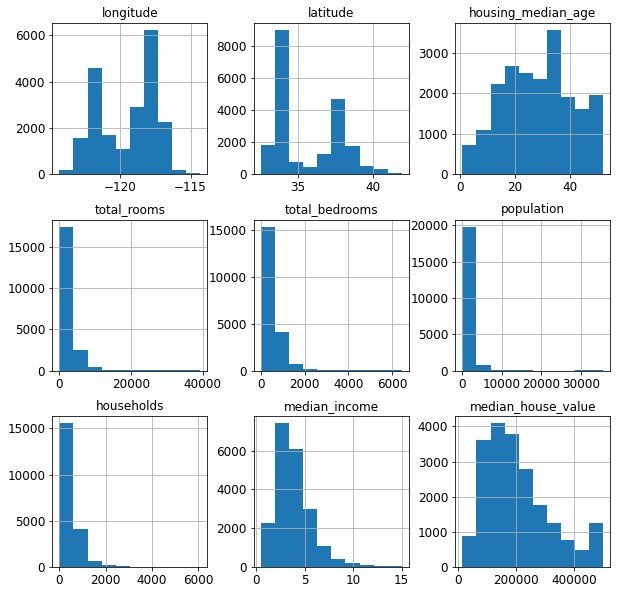

In [8]:
housing.hist(figsize=(10,10))

**NOTES** Draw conclusions - median income is 'capped' at 15 - it might be rounded to this. Also median house value is capped at 500 000.

<AxesSubplot:>

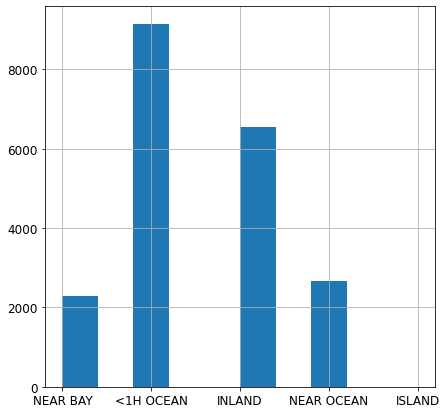

In [9]:
housing.ocean_proximity.hist(figsize=(7,7))

<AxesSubplot:xlabel='latitude', ylabel='housing_median_age'>

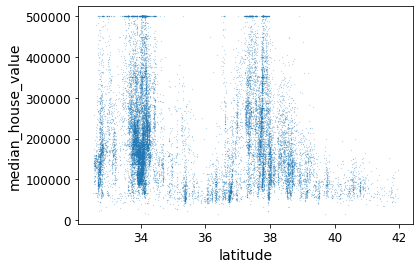

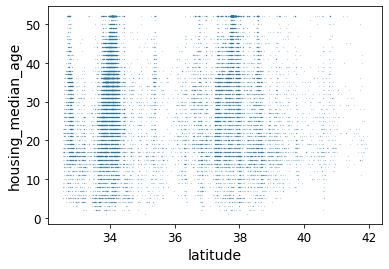

In [10]:
housing.plot(kind="scatter", x="latitude", y="median_house_value",s=0.01) 
housing.plot(kind="scatter", x="latitude", y="housing_median_age",s=0.01) 

array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

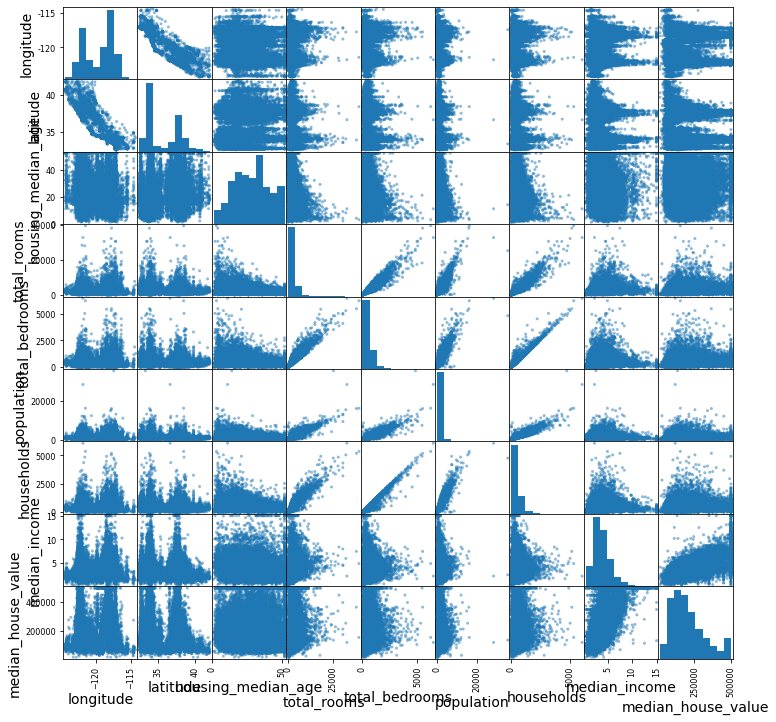

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(12,12))

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
housing.drop(housing[housing['housing_median_age']>=50].index,axis=0,inplace=True)
housing.drop(housing[housing['median_house_value']>=500000].index,axis=0,inplace=True)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18388.000000,18388.000000,18388.000000,18388.000000,18197.000000,18388.000000,18388.000000,18388.000000,18388.000000
mean,-119.478969,35.589652,26.769850,2677.363172,549.348849,1474.974114,509.931695,3.699059,189299.015499
std,1.979410,2.147683,11.267538,2231.604754,430.867749,1166.690292,390.867122,1.570513,95294.032885
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.540000,33.920000,17.000000,1459.000000,300.000000,814.000000,284.000000,2.541700,115400.000000
50%,-118.450000,34.240000,27.000000,2147.000000,443.000000,1208.000000,416.000000,3.476850,171150.000000
75%,-117.970000,37.670000,36.000000,3194.250000,660.000000,1785.000000,615.000000,4.625000,243000.000000
max,-114.310000,41.950000,49.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000


<AxesSubplot:>

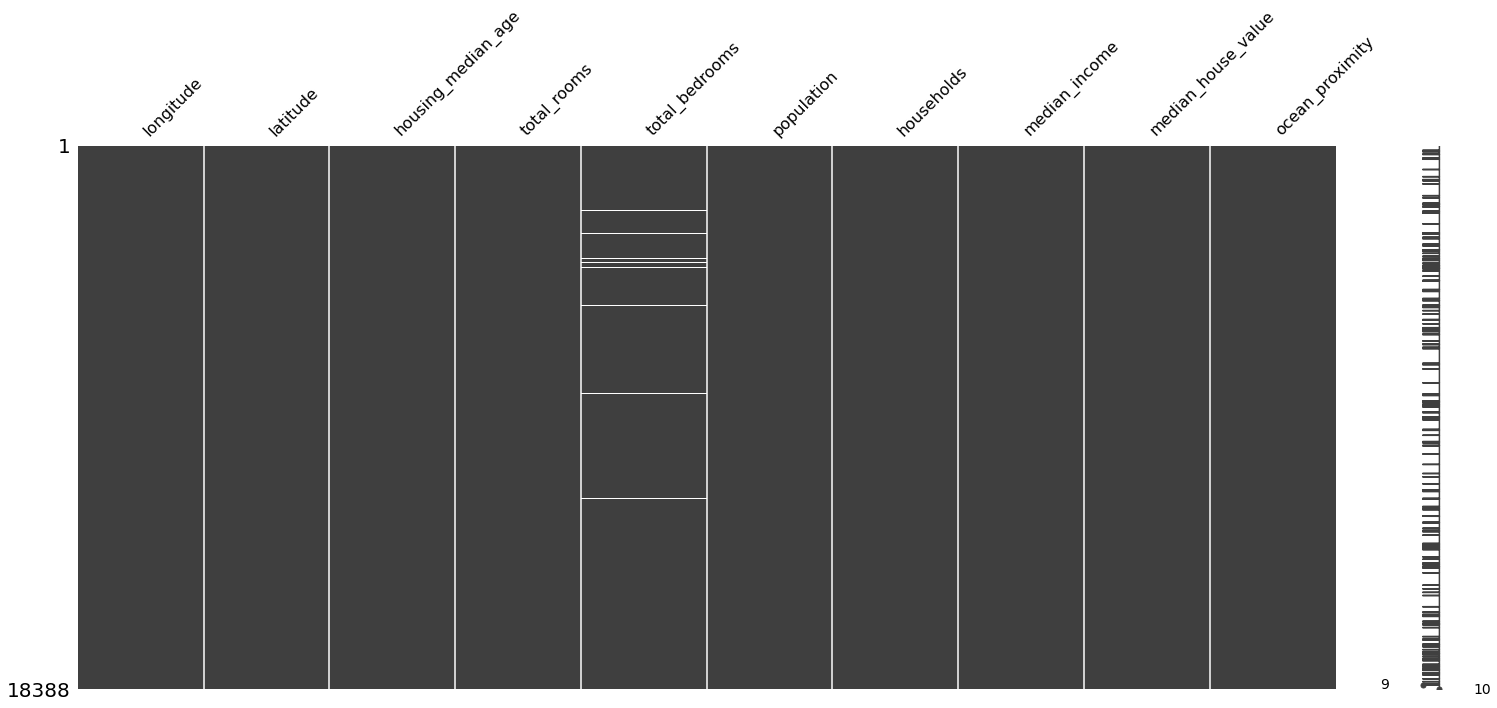

In [14]:
import missingno as msno
msno.matrix(housing)

**OP Note** There is an issue with total bedrooms. Check to see what values there are for total rooms.

In [15]:
housing[housing["total_bedrooms"].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


**OP Note** We are missing approximately 1% of the total bedroom data. We can either interpolate something from total rooms, however this is likely to be wrong. Proposal - do one instance of the pipeline using the entire column dropped, and another using all the NAN rows dropped. Start with dropping the rows only (I think  this should be the best option, because we only lose 1% of data, and it looks like there is a decent variety in the other features, so hopefully this doesn't introduce bias.

In [16]:
housing_wbeds = housing.dropna(0) # create dataset that has Nan bedroom rows removed

In [17]:
print(housing.total_rooms.describe())
print(housing_wbeds.total_rooms.describe())

count    18388.000000
mean      2677.363172
std       2231.604754
min          2.000000
25%       1459.000000
50%       2147.000000
75%       3194.250000
max      39320.000000
Name: total_rooms, dtype: float64
count    18197.000000
mean      2678.134857
std       2235.590901
min          2.000000
25%       1461.000000
50%       2146.000000
75%       3191.000000
max      39320.000000
Name: total_rooms, dtype: float64


**OP Note** Looks like it hasn't changed the stats much - GOOD

In [18]:
housing_wbeds.corr()['median_house_value']

longitude            -0.023207
latitude             -0.171497
housing_median_age    0.014772
total_rooms           0.152990
total_bedrooms        0.079743
population            0.021869
households            0.099260
median_income         0.664614
median_house_value    1.000000
Name: median_house_value, dtype: float64

**OP Note** Looks like the median income is the most important numerical feature. Intersetingly, latitide is also very (negatively) correlated.

In [19]:
print(housing_wbeds.groupby('ocean_proximity').mean())

                  longitude   latitude  housing_median_age  total_rooms  \
ocean_proximity                                                           
<1H OCEAN       -118.848480  34.567210           28.176932  2638.220032   
INLAND          -119.724458  36.729742           23.298145  2763.332374   
ISLAND          -118.400000  33.390000           28.000000  1195.500000   
NEAR BAY        -122.223440  37.814060           31.746667  2662.105333   
NEAR OCEAN      -119.257403  34.665316           27.862478  2599.197715   

                 total_bedrooms   population  households  median_income  \
ocean_proximity                                                           
<1H OCEAN            555.277458  1564.591772  526.335007       4.020594   
INLAND               542.089731  1415.464331  485.029750       3.207955   
ISLAND               367.500000   583.000000  252.000000       2.381050   
NEAR BAY             540.521333  1331.339333  514.043333       4.033718   
NEAR OCEAN           553

**OP Note** Average prices look as expected for locations.

<AxesSubplot:title={'center':'median_house_value'}, xlabel='ocean_proximity'>

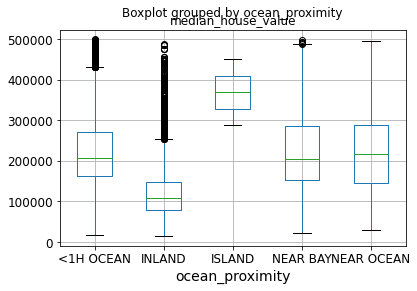

In [20]:
housing_wbeds.boxplot('median_house_value','ocean_proximity')

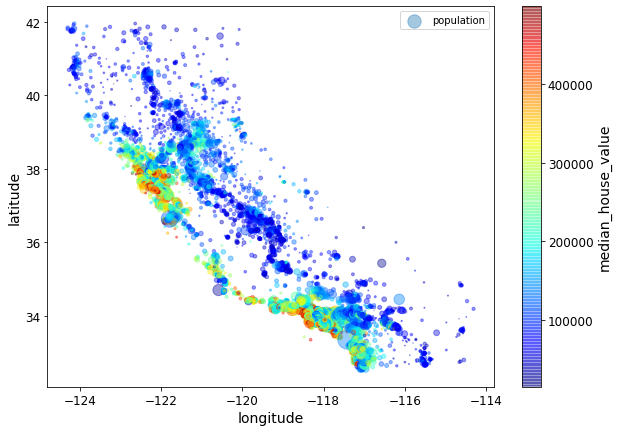

In [21]:
housing_wbeds.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_wbeds["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) 
plt.legend()

(18197,)


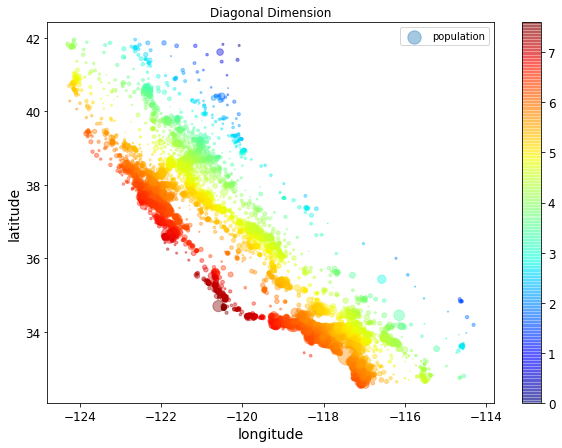

In [22]:
# Create new feature which is a diagonal line on the map
diagonal = np.abs(housing_wbeds["longitude"].values + housing_wbeds["latitude"].values)
diagonal = diagonal-np.amin(diagonal)
housing_wbeds.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_wbeds["population"]/100, label="population", figsize=(10,7),
    c=diagonal, cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) 
plt.title('Diagonal Dimension')
plt.legend()
print(diagonal.shape)

In [23]:
# Create New Feature for Closeness to San Francisco
sanfran_coord = [37.7749,-122.4194]
lasangeles_coord = [34.052235,-118.243683]
test_point = np.array([-122.23,37.88])

lats_diff_test = (37.88-37.7749)**2
longs_diff_test = (-122.23+122.4194)**2
dist_test = (lats_diff_test+longs_diff_test)**0.5

print(dist_test)

lats_diff_sf = np.square(housing_wbeds['latitude'].values-sanfran_coord[0])
longs_diff_sf = np.square(housing_wbeds['longitude'].values-sanfran_coord[1])
dist_sf = np.sqrt(lats_diff_sf+longs_diff_sf)
print(dist_sf.shape)
print(dist_sf[0:5])
print(np.mean(dist_sf))
print(np.amax(dist_sf))

0.2166064865141324
(18197,)
[0.21660649 0.2168003  0.17218121 0.16721355 0.16721355]
3.994247934316678
9.310052973533503


In [24]:
lats_diff_la = np.square(housing_wbeds['latitude'].values-lasangeles_coord[0])
longs_diff_la = np.square(housing_wbeds['longitude'].values-lasangeles_coord[1])
dist_la = np.sqrt(lats_diff_la+longs_diff_la)
print(dist_la.shape)
print(dist_la[0:5])
print(np.mean(dist_la))
print(np.amax(dist_la))

# Choose distance limit for urban distance check as '1.5'
urban_distance_limit = 1.5
urban_list = np.logical_or(dist_la<urban_distance_limit,dist_sf<urban_distance_limit)
urban_list = urban_list*1
print(urban_list.shape)
print(urban_list)

(18197,)
[5.52652767 5.50546739 5.52068528 5.53482137 5.53482137]
2.5897359168237934
9.86550856771783
(18197,)
[1 1 1 ... 0 0 0]


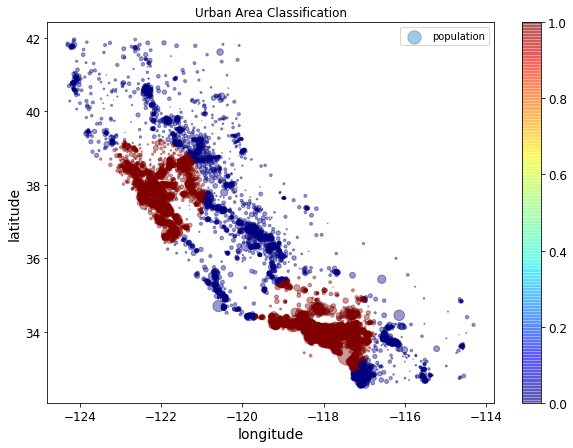

In [25]:
housing_wbeds.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_wbeds["population"]/100, label="population", figsize=(10,7),
    c=urban_list, cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) 
plt.title('Urban Area Classification')
plt.legend()

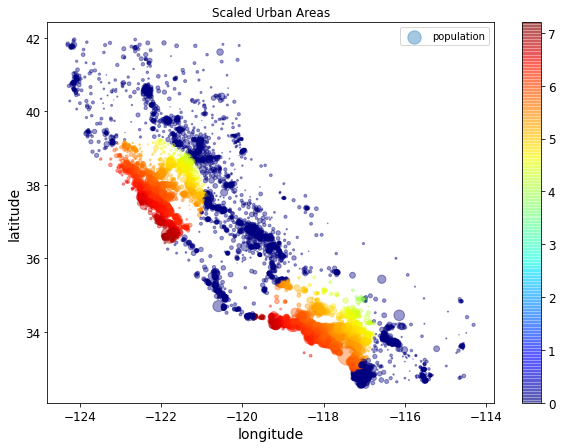

In [26]:
scaled_urban = urban_list*(diagonal)
housing_wbeds.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing_wbeds["population"]/100, label="population", figsize=(10,7),
    c=scaled_urban, cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) 
plt.title('Scaled Urban Areas')
plt.legend()

In [27]:
beds_per_rooms = housing_wbeds['total_bedrooms'].values/housing_wbeds['total_rooms']
households_per_person = housing_wbeds['households'].values/housing_wbeds['population']

## Update dataframe with new features

In [28]:
housing_wbeds.insert(0, 'diagonal', diagonal)
housing_wbeds.insert(0, 'scaled_urban', scaled_urban)
housing_wbeds.insert(0, 'beds_per_rooms', beds_per_rooms)
housing_wbeds.insert(0, 'households_per_person', households_per_person)
housing_wbeds['urban'] = urban_list


C:\Users\opalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
print(housing_wbeds.head())

    households_per_person  beds_per_rooms  scaled_urban  diagonal  longitude  \
0                0.391304        0.146591          6.06      6.06    -122.23   
1                0.473969        0.155797          6.07      6.07    -122.22   
8                0.493367        0.260274          6.13      6.13    -122.26   
20               0.405868        0.245007          6.13      6.13    -122.27   
21               0.393972        0.223917          6.13      6.13    -122.27   

    latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0      37.88                41.0        880.0           129.0       322.0   
1      37.86                21.0       7099.0          1106.0      2401.0   
8      37.84                42.0       2555.0           665.0      1206.0   
20     37.85                40.0        751.0           184.0       409.0   
21     37.85                42.0       1639.0           367.0       929.0   

    households  median_income  median_house_value ocean_

In [30]:
housing_wbeds.corr()['median_house_value']

households_per_person    0.218961
beds_per_rooms          -0.233904
scaled_urban             0.424701
diagonal                 0.499812
longitude               -0.023207
latitude                -0.171497
housing_median_age       0.014772
total_rooms              0.152990
total_bedrooms           0.079743
population               0.021869
households               0.099260
median_income            0.664614
median_house_value       1.000000
urban                    0.357062
Name: median_house_value, dtype: float64

## Part 2 - prepare data for machine learning algo :  
2.1 Change class data to numerical data  
2.2 Scale data  
2.3 Split data into training / cross val / test data   

In [31]:
proxim_dummies = pd.get_dummies(housing_wbeds['ocean_proximity'],drop_first=True) #all columns
# First column (1hr from the ocean) is dropped, so any entry with all zeros corresponds to this type.
print(proxim_dummies.head())
print(housing_wbeds[housing_wbeds['ocean_proximity']=='ISLAND'])

    INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0        0       0         1           0
1        0       0         1           0
8        0       0         1           0
20       0       0         1           0
21       0       0         1           0
      households_per_person  beds_per_rooms  scaled_urban  diagonal  \
8314               0.444892        0.311045          6.68      6.68   
8318               0.409953        0.298883          6.76      6.76   

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8314    -118.32     33.35                27.0       1675.0           521.0   
8318    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
8314       744.0       331.0         2.1579            450000.0   
8318       422.0       173.0         2.6042            287500.0   

     ocean_proximity  urban  
8314          ISLAND      1  
8318          ISLAND      1  


In [32]:
from sklearn.preprocessing import StandardScaler
# define scaler to center mean at zero and have variance of 1
scaler = StandardScaler()
# scale and standardise
print(housing_wbeds.shape)
pre_process_array = scaler.fit_transform(housing_wbeds.values[:,0:12])
print(pre_process_array.shape)
print(pre_process_array[0:5,:])
print(scaler.mean_)
print(np.mean(pre_process_array,axis=0))
print(np.amax(pre_process_array, axis=0))
print(np.amin(pre_process_array, axis=0))

(18197, 15)
(18197, 12)
[[ 0.36367597 -1.21210522  0.6746149   0.55641239 -1.39010702  1.06607655
   1.26408199 -0.80434406 -0.97561352 -0.98705135 -0.98209723  2.94609805]
 [ 1.2784536  -1.04609468  0.67852265  0.56847581 -1.3850544   1.05676592
  -0.51076803  1.97754724  1.29196592  0.79356058  1.60725098  2.93093999]
 [ 1.49310638  0.8379968   0.70196915  0.64085635 -1.40526489  1.04745528
   1.35282449 -0.05508085  0.26842188 -0.22992728  0.21790703 -1.03117242]
 [ 0.52483853  0.56267388  0.70196915  0.64085635 -1.41031751  1.0521106
   1.17533949 -0.86204851 -0.84796063 -0.91253801 -0.87975146 -1.49139142]
 [ 0.39319663  0.18235422  0.70196915  0.64085635 -1.41031751  1.0521106
   1.35282449 -0.46482718 -0.42322467 -0.46717091 -0.36802256 -1.26484852]]
[ 3.58440391e-01  2.13805045e-01  4.33364895e+00  5.59876078e+00
 -1.19478742e+02  3.55899808e+01  2.67556191e+01  2.67813486e+03
  5.49348849e+02  1.47445760e+03  5.09834973e+02  3.69946654e+00]
[-1.76493552e-16  6.59117513e-16 -3.

In [33]:
x_array = np.append(np.append(pre_process_array,proxim_dummies.values,axis=1),np.reshape(housing_wbeds['urban'].values,(-1,1)),axis=1)
print(x_array.shape)
print(x_array[0:5,:])

(18197, 17)
[[ 0.36367597 -1.21210522  0.6746149   0.55641239 -1.39010702  1.06607655
   1.26408199 -0.80434406 -0.97561352 -0.98705135 -0.98209723  2.94609805
   0.          0.          1.          0.          1.        ]
 [ 1.2784536  -1.04609468  0.67852265  0.56847581 -1.3850544   1.05676592
  -0.51076803  1.97754724  1.29196592  0.79356058  1.60725098  2.93093999
   0.          0.          1.          0.          1.        ]
 [ 1.49310638  0.8379968   0.70196915  0.64085635 -1.40526489  1.04745528
   1.35282449 -0.05508085  0.26842188 -0.22992728  0.21790703 -1.03117242
   0.          0.          1.          0.          1.        ]
 [ 0.52483853  0.56267388  0.70196915  0.64085635 -1.41031751  1.0521106
   1.17533949 -0.86204851 -0.84796063 -0.91253801 -0.87975146 -1.49139142
   0.          0.          1.          0.          1.        ]
 [ 0.39319663  0.18235422  0.70196915  0.64085635 -1.41031751  1.0521106
   1.35282449 -0.46482718 -0.42322467 -0.46717091 -0.36802256 -1.2648485

In [34]:
# This makes the y_array vector an array to add using append for manipulation purposes
# Needs to be changed back to a vector
y_array = np.array(housing_wbeds.values[:,12:13])
print(y_array.shape)
print(y_array[0:5])

(18197, 1)
[[452600.0]
 [358500.0]
 [226700.0]
 [147500.0]
 [159800.0]]


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

# To make this work, I need to make the 'y' in shuffle split, a function of the ocean proximity labels
fake_y = np.array(housing_wbeds['ocean_proximity']) #ocean proximity labels
fake_x = np.append(pre_process_array,y_array,axis=1) # atual w becomes last column of x

original_splitter = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train_index, test_index in original_splitter.split(fake_x,fake_y):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = x_array[train_index], x_array[test_index]
     y_train, y_test = y_array[train_index], y_array[test_index]
        
print(" y_test shape = " +str(y_test.shape))
print(" X_test shape = " +str(X_test.shape))
print(" y_train shape = " +str(y_train.shape))
print(" X_train shape = " +str(X_train.shape))
print("Number of island samples in TEST = " + str(np.sum(X_test,axis=0)[13]))
print("Number of island samples in TRAIN = " + str(np.sum(X_train,axis=0)[13]))
print(X_train[0:2,:])


TRAIN: [13805 10276  4228 ... 16783 17568  3441] TEST: [ 4852  8505 13314 ...  9486  4122  3376]
 y_test shape = (3640, 1)
 X_test shape = (3640, 17)
 y_train shape = (14557, 1)
 X_train shape = (14557, 17)
Number of island samples in TEST = 0.0
Number of island samples in TRAIN = 2.0
[[ 0.03663722  0.30524675  0.55738239  0.19450969  1.12609896 -1.11261181
  -1.48693554 -0.28097812 -0.17720274 -0.14770566 -0.09936489 -0.57534798
   0.          0.          0.          0.          1.        ]
 [-0.29992535 -1.15672519  0.58082889  0.26689023  0.7522049  -0.79605026
  -0.15579803  0.32335299 -0.09364813  0.02444586 -0.03028149  1.89216723
   0.          0.          0.          0.          1.        ]]


In [36]:
# Checking Data is still correct after previous shenanigans
print(" Test Index 150 \n" + str(test_index[150]))
print(" Test Row 150 \n" + str(X_test[150,:]))
print(" Test Y 150 \n" + str(y_test[150,:]))
print(" Y array index  \n" + str(y_array[test_index[150],:]))
print(" X array index  \n" + str(x_array[test_index[150],:]))

 Test Index 150 
2022
 Test Row 150 
[ 0.15640825  0.0348847  -1.69348185 -1.90452595  0.03978513  0.69830651
 -0.42202553 -0.20895938 -0.1679189  -0.60078104 -0.56759683 -0.23728508
  1.          0.          0.          0.          0.        ]
 Test Y 150 
[102700.0]
 Y array index  
[102700.0]
 X array index  
[ 0.15640825  0.0348847  -1.69348185 -1.90452595  0.03978513  0.69830651
 -0.42202553 -0.20895938 -0.1679189  -0.60078104 -0.56759683 -0.23728508
  1.          0.          0.          0.          0.        ]


In [37]:
print(" Train Index 150 \n" + str(train_index[150]))
print(" Train Row 150 \n" + str(X_train[150,:]))
print(" Train Y 150 \n" + str(y_train[150,:]))
print(" Y array index  \n" + str(y_array[train_index[150],:]))
print(" X array index  \n" + str(x_array[train_index[150],:]))

 Train Index 150 
12119
 Train Row 150 
[-0.17110043 -0.63396445  0.24476236 -0.77056417  1.08567798 -0.70294392
  0.90911199 -0.18390939 -0.33502813 -0.25647801 -0.27335271  0.03218442
  1.          0.          0.          0.          1.        ]
 Train Y 150 
[95200.0]
 Y array index  
[95200.0]
 X array index  
[-0.17110043 -0.63396445  0.24476236 -0.77056417  1.08567798 -0.70294392
  0.90911199 -0.18390939 -0.33502813 -0.25647801 -0.27335271  0.03218442
  1.          0.          0.          0.          1.        ]


In [38]:
# Reshape y values back to vectors
print(y_test.shape)
print(y_train.shape)

y_train = np.reshape(y_train,-1)
y_test = np.reshape(y_test,-1)

print(y_test.shape)
print(y_train.shape)

(3640, 1)
(14557, 1)
(3640,)
(14557,)


## Part 3 - Train models

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

lasso = Lasso(alpha=1,normalize=False)
lasso.fit(X_train,y_train)
y_pred_lasso = np.maximum(0,lasso.predict(X_test))

In [40]:
print(y_pred_lasso.shape)

error_percent_array = np.abs(np.divide(np.subtract(y_pred_lasso,y_test),y_test))
print(error_percent_array)

print("R^2 Lasso - TRAIN: {}".format(lasso.score(X_train, y_train)))

print("Mean Percent Error Lasso: " + str(np.mean(error_percent_array)*100))
print("R^2 Lasso: {}".format(lasso.score(X_test, y_test)))

(3640,)
[0.10977903310124965 0.6040336947663505 0.4481508588220211 ...
 0.06368073584251781 0.4682093455777094 0.07251776965815655]
R^2 Lasso - TRAIN: 0.674644111275053
Mean Percent Error Lasso: 24.144951007815017
R^2 Lasso: 0.68337399004029


In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=False)
reg.fit(X_train,y_train)
y_pred_reg = np.maximum(0,reg.predict(X_test))

error_percent_array_reg = np.abs(np.divide(np.subtract(y_pred_reg,y_test),y_test))

print("R^2 Reg - TRAIN: {}".format(reg.score(X_train, y_train)))

print("Percent Error Lin Reg: " + str(np.mean(error_percent_array_reg)*100))
print("R^2 Lin Reg : {}".format(reg.score(X_test, y_test)))
print(reg.coef_)
print(lasso.coef_)

R^2 Reg - TRAIN: 0.6747702194476908
Percent Error Lin Reg: 24.14433658422274
R^2 Lin Reg : 0.6834053870567084
[ 2.17222019e+04  8.50969518e+03  9.28790287e+04  1.67518557e+17
  3.99960073e+17  4.34094442e+17  5.75165401e+03  5.93899165e+03
  6.89634875e+03 -1.05084795e+03 -7.63632658e+03  5.94633374e+04
 -1.75859159e+04  1.35350239e+05 -2.01184878e+04  9.53157434e+03
 -1.75620800e+05]
[  21642.71767858    8396.51518787   93028.73956663    9939.36463625
     577.63737387    -176.91745758    5699.10090982    5941.52360971
    7188.40029526   -1424.67188885   -7698.34919874   59377.95403882
  -17611.77179976  129011.97678327  -20136.0471384     9611.7850882
 -175583.07390221]


In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10,normalize=False)
ridge.fit(X_train,y_train)
y_pred_ridge = np.maximum(0,ridge.predict(X_test))

error_percent_array_ridge = np.abs(np.divide(np.subtract(y_pred_ridge,y_test),y_test))

print("R^2 Reg - TRAIN: {}".format(ridge.score(X_train, y_train)))

print("Percent Error Ridge: " + str(np.mean(error_percent_array_ridge)*100))
print("R^2 Ridge : {}".format(ridge.score(X_test, y_test)))

R^2 Reg - TRAIN: 0.6739737505310552
Percent Error Ridge: 24.176058131049828
R^2 Ridge : 0.682845233282186


In [43]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)
y_pred_dt = np.maximum(0,dt.predict(X_test))

error_percent_array_dt = np.abs(np.divide(np.subtract(y_pred_dt,y_test),y_test))

print("R^2 Decision Tree - TRAIN: {}".format(dt.score(X_train, y_train)))

print("Percent Error Decision Tree: " + str(np.mean(error_percent_array_dt)*100))
print("R^2 Decision Tree : {}".format(dt.score(X_test, y_test)))

R^2 Decision Tree - TRAIN: 1.0
Percent Error Decision Tree: 22.85262908978618
R^2 Decision Tree : 0.616438419757503


In [44]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(random_state=42)

rforest.fit(X_train,y_train)
y_pred_rf = np.maximum(0,rforest.predict(X_test))

error_percent_array_rf = np.abs(np.divide(np.subtract(y_pred_rf,y_test),y_test))

print("R^2 RForest - TRAIN: {}".format(rforest.score(X_train, y_train)))

print("Percent Error Rforest: " + str(np.mean(error_percent_array_rf)*100))
print("R^2 Rforest : {}".format(rforest.score(X_test, y_test)))

R^2 RForest - TRAIN: 0.9718172762493441
Percent Error Rforest: 16.355232892075133
R^2 Rforest : 0.8142749944918655


## Cross validation

In [45]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# I'm just going to use Strathified kfold here to save time, but to do properly, go back to genertaing the indices splits
# and add a stratified kfold to generate cross validation split indices

cv_results = cross_val_score(ridge, X_train, y_train, cv=10)#change back from 'x_array'

print(cv_results)

print("Average CV Score Ridge: {}".format(str(cv_results.mean())))

cv_results_forest = cross_val_score(rforest, X_train, y_train, cv=10)#change back from 'x_array'

print(cv_results_forest)

print("Average CV Score RForest: {}".format(str(cv_results_forest.mean())))

[0.6629681  0.68284722 0.68343999 0.64954498 0.69172365 0.67302782
 0.68984835 0.66707916 0.66923497 0.65500564]
Average CV Score Ridge: 0.672471987035616
[0.78360232 0.80757109 0.81020788 0.78815764 0.80928318 0.80856935
 0.81009297 0.78636609 0.77112344 0.78323029]
Average CV Score RForest: 0.7958204249231975


## Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': 0.01*np.arange(1,100)}

ridge = Ridge(normalize=False)

ridge_cv = GridSearchCV(ridge, param_grid, cv=10)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.best_params_['alpha']
print(best_alpha)

0.96


In [47]:
ridge = Ridge(alpha=best_alpha,normalize=False)
ridge.fit(X_train,y_train)
y_pred_ridge_train = np.maximum(0,ridge.predict(X_train))

error_percent_array_ridge_train = np.abs(np.divide(np.subtract(y_pred_ridge_train,y_train),y_train))

print("Percent Error Ridge - TRAIN: " + str(np.mean(error_percent_array_ridge_train)*100))
print("R^2 Ridge - TRAIN: {}".format(ridge.score(X_test, y_test)))

Percent Error Ridge - TRAIN: 23.903792065242946
R^2 Ridge - TRAIN: 0.683358324745518


In [48]:
y_pred_ridge = np.maximum(0,ridge.predict(X_test))

error_percent_array_ridge = np.abs(np.divide(np.subtract(y_pred_ridge,y_test),y_test))

print("Percent Error Ridge - TEST: " + str(np.mean(error_percent_array_ridge)*100))
print("R^2 Ridge TEST: {}".format(ridge.score(X_test, y_test)))

Percent Error Ridge - TEST: 24.144973651469577
R^2 Ridge TEST: 0.683358324745518


[  21644.10585986    8423.25330896   91330.26588021    9216.59052835
   -1409.40444138   -2258.13635612    5711.25307546    5922.93726656
    7342.29696442   -1412.80927047   -7856.9598458    59402.5332927
  -17949.94905739   92351.19763279  -20152.88572569    9592.3599378
 -171892.7051944 ]


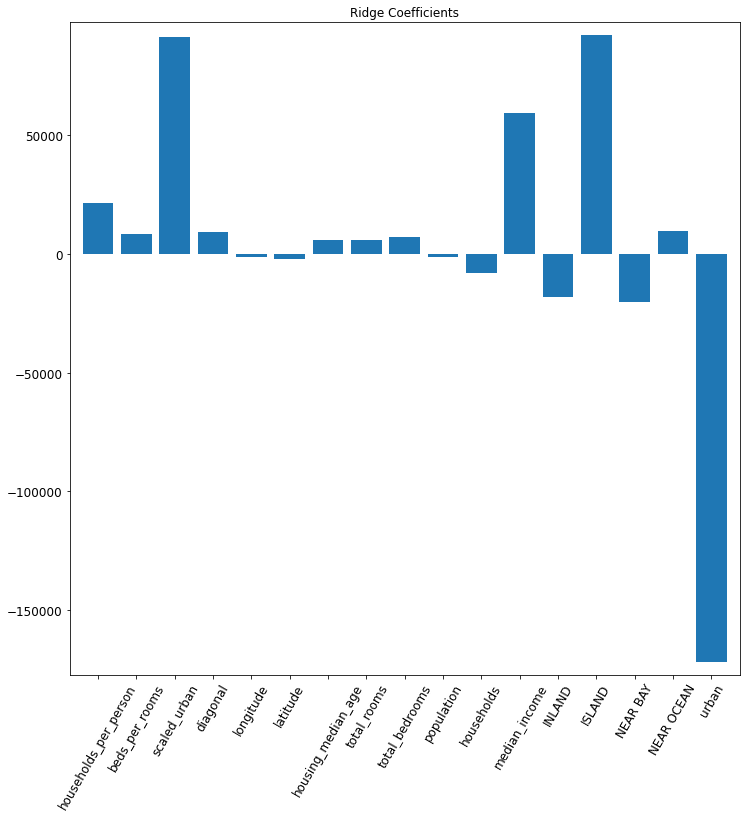

In [49]:
labels = list(housing_wbeds.columns[0:12])+list(proxim_dummies.columns)+['urban']
print(ridge.coef_)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(range(len(x_array[0,:])), ridge.coef_)
plt.xticks(range(len(x_array[0,:])), labels, rotation=60)
plt.margins(0.02)
plt.title('Ridge Coefficients')
plt.show()

## Decision Tree + RandomForest Tuning

In [50]:
param_grid = {'max_depth': [9,14,20],
              'max_features': [8,12,16],
              'ccp_alpha': [0,0.1,1]
             }

dt = DecisionTreeRegressor()

dt_cv = GridSearchCV(dt, param_grid, cv=5)
dt_cv.fit(X_train, y_train)
dt_best_params = dt_cv.best_params_
print(dt_best_params)

{'ccp_alpha': 1, 'max_depth': 9, 'max_features': 12}


In [51]:
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)
y_pred_dt = np.maximum(0,dt.predict(X_test))

error_percent_array_dt = np.abs(np.divide(np.subtract(y_pred_dt,y_test),y_test))

print("Percent Error Decision Tree: " + str(np.mean(error_percent_array_dt)*100))
print("R^2 Decision Tree : {}".format(dt.score(X_test, y_test)))

Percent Error Decision Tree: 23.06370374854663
R^2 Decision Tree : 0.6120700551119127


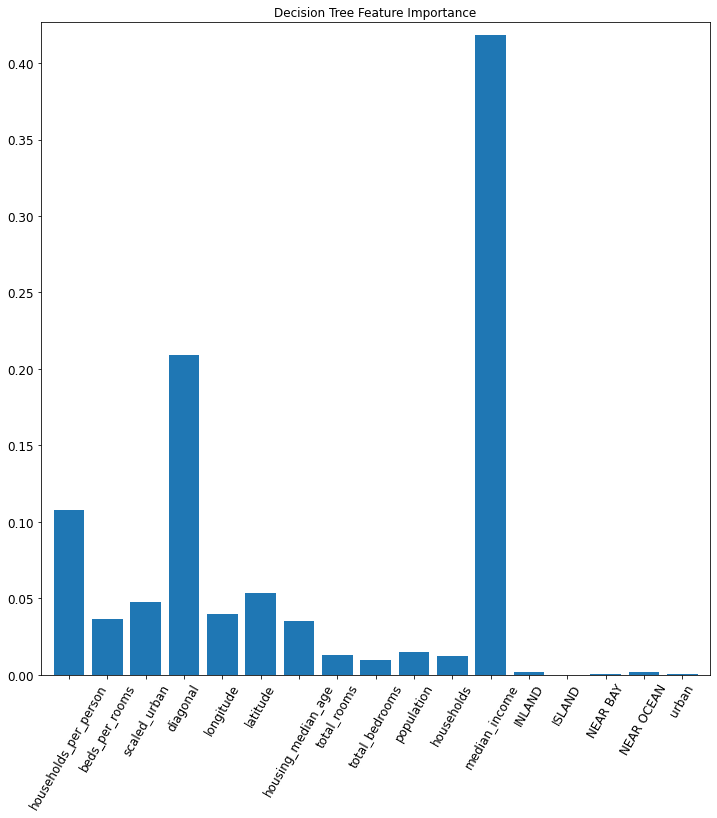

In [52]:
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(range(len(x_array[0,:])), dt.feature_importances_)
plt.xticks(range(len(x_array[0,:])), labels, rotation=60)
plt.margins(0.02)
plt.title('Decision Tree Feature Importance')
plt.show()

In [53]:
param_grid = {'n_estimators': [20],
              'max_depth': [70,75,80],
              'max_features': [8,16],
              'ccp_alpha': [1]
             }

rforest = RandomForestRegressor()

rforest_cv = GridSearchCV(rforest, param_grid, cv=5)
rforest_cv.fit(X_train, y_train)
best_params = rforest_cv.best_params_
print(best_params)

{'ccp_alpha': 1, 'max_depth': 70, 'max_features': 8, 'n_estimators': 20}


In [54]:
rforest = RandomForestRegressor(**best_params)
rforest.fit(X_train,y_train)
y_pred_rf = np.maximum(0,rforest.predict(X_test))

error_percent_array_rf = np.abs(np.divide(np.subtract(y_pred_rf,y_test),y_test))
print(error_percent_array_rf)
print("Percent Error Rforest: " + str(np.mean(error_percent_array_rf)*100))
print("R^2 Rforest : {}".format(rforest.score(X_test, y_test)))

[0.18143260292164676 0.7991514360313315 0.7458957459556621 ...
 0.026832659251769465 0.359006734006734 0.1791308500477555]
Percent Error Rforest: 16.259905724612747
R^2 Rforest : 0.8194996945053795


Text(0, 0.5, 'Percentage signed error')

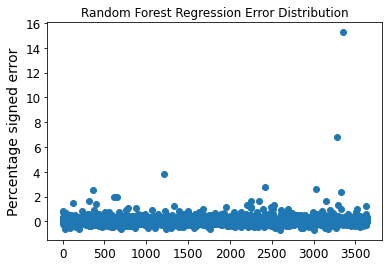

In [55]:
plt.scatter(range(0,len(y_test)),np.divide(np.subtract(y_pred_rf,y_test),y_test))
plt.title('Random Forest Regression Error Distribution')
plt.ylabel('Percentage signed error')

Text(0, 0.5, 'absolute error proportion')

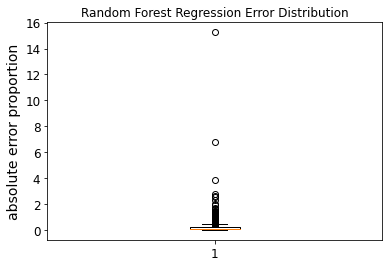

In [56]:
plt.boxplot(error_percent_array_rf)
plt.title('Random Forest Regression Error Distribution')
plt.ylabel('absolute error proportion')

Text(0, 0.5, 'absolute error proportion')

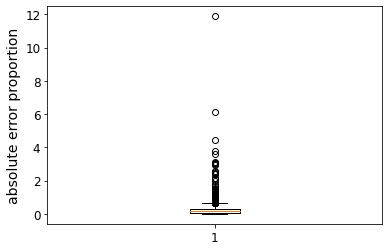

In [57]:
plt.boxplot(error_percent_array_ridge)
plt.ylabel('absolute error proportion')

Percent Error Rforest: 15.795516014953769


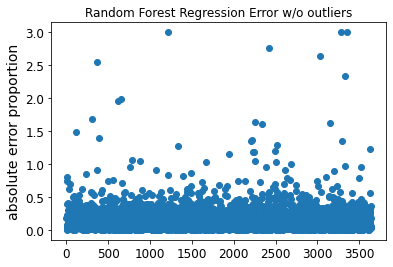

In [58]:
error_percent_array_rf = np.minimum(3,error_percent_array_rf)
plt.scatter(range(0,len(y_test)),error_percent_array_rf)
plt.title('Random Forest Regression Error w/o outliers')
plt.ylabel('absolute error proportion')
print("Percent Error Rforest: " + str(np.mean(error_percent_array_rf)*100))

In [59]:
from scipy import stats
confidence = 0.95
squared_errors = (y_pred_rf - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([38847.69729415, 42712.74040201])